- **Pedro Alonso Lopez Torres**
- **Elisa Ottoboni**

# Exercise 1: Analytical exercises

## a) Expression for Ridge regression

Show that the optimal parameters are equal to

$$
\hat{\beta}_{\text{Ridge}} = \left( X^TX + \lambda I \right)^{-1} X^T y
$$

with $I$ being a $p \times p$ identity matrix.

We start by expressing the optimization formula of $\operatorname{MSE}$, our cost function $C(\beta)$, with the addition of a regularization parameter $\lambda$

$$
\min_{\beta \in \mathbb{R}^p} \frac{1}{n} \| y - X\beta \|_2^2 + \lambda \| \beta \|_2^2
$$

where we have used the definition of a norm-2 vector, that is

$$
\| \mathbf{x} \|_2 = \sqrt{ \sum_i x_i^2 }
$$

In order to obtain the $\hat{\beta}_{\text{Ridge}}$ parameters, we start by expanding the above $\operatorname{MSE}$ equation

\begin{align*}
C(\boldsymbol{\beta}) 
& = \frac{1}{n} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta} \\
& = \frac{1}{n} (\mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X} \boldsymbol{\beta} - \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{y} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta} \\
& = \frac{1}{n} \left( \mathbf{y}^T \mathbf{y} - 2 \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{y} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \right) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta}
\end{align*}


Now, we take the derivative of $C(\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$ and set it equal to 0 to minimize it

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = - \frac{2}{n} \mathbf{X}^T \mathbf{y} + \frac{2}{n} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} + 2 \lambda \boldsymbol{\beta} = 0
$$

We divide the equation by 2 to simplify it:

$$
-\frac{1}{n} \mathbf{X}^T \mathbf{y} + \frac{1}{n} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} + \lambda \boldsymbol{\beta} = 0
$$

We then rearrange the terms to isolate $\beta$ and multiply both sides by $n$:

$$
\frac{1}{n} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} + \lambda \boldsymbol{\beta} = \frac{1}{n} \mathbf{X}^T \mathbf{y}
$$

$$
\mathbf{X}^T \mathbf{X} \boldsymbol{\beta} + n\lambda \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y}
$$

Since $\lambda$ is a number, we rewrite $n\lambda$ as just $\lambda$, knowing that this could be considered an abuse of notation.

$$
\left( \mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right) \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y}
$$

Finally, we obtain the expression for the optimal Ridge regression parameters.

$$
\boldsymbol{\beta}_{\text{Ridge}} = \left( \mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$

At this point, we also derive the $\boldsymbol{\beta}_{\text{OLS}}$ parameters. We start by expanding the cost function

\begin{align*}
C(\boldsymbol{\beta}) 
& = \frac{1}{n} \left( \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \right)^T \left( \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \right) \\
& = \frac{1}{n} \left( \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\boldsymbol{\beta} - \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} \right) \\
& = \frac{1}{n} \left( \mathbf{y}^T\mathbf{y} - 2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} \right)
\end{align*}

We can now differentiate it and set it to 0

$$
\frac{dC(\boldsymbol{\beta})}{d\boldsymbol{\beta}} = 0
$$

$$
-2\mathbf{y}^T\mathbf{X} + 2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X} = 0
$$

$$
2\left( -\mathbf{y}^T\mathbf{X} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X} \right) = 0
$$

$$
\boldsymbol{\beta}^T = \mathbf{y}^T\mathbf{X} \left( \mathbf{X}^T\mathbf{X} \right)^{-1}
$$

At the end, we obtain the parameters we were looking for

$$
\boldsymbol{\beta}_{\text{OLS}} = \left( \mathbf{X}^T\mathbf{X} \right)^{-1}\mathbf{X}^T\mathbf{y}
$$

## b) The singular value decomposition

# Exercise 2: Adding Ridge Regression

In [1]:
# linear algebra
import numpy as np                 

#visualization
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from prettytable import PrettyTable

In [2]:
np.random.seed(1001021)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2) + np.random.normal(0, 0.1, x.shape)

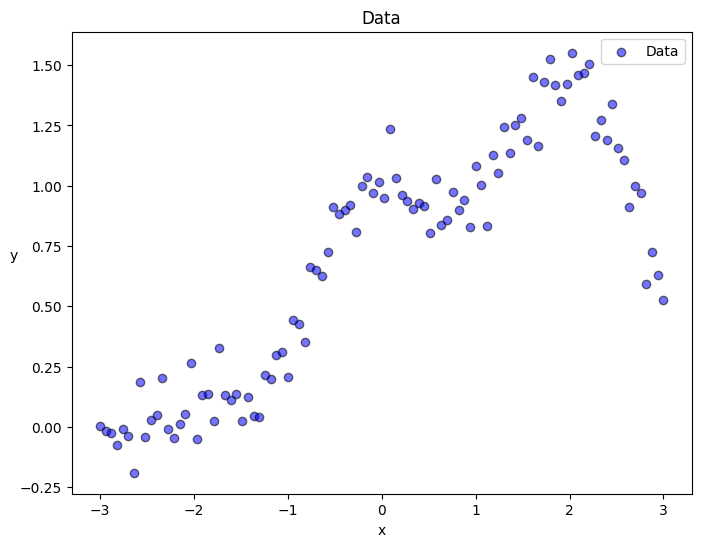

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Data')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Data')
plt.legend()
plt.show()

In [4]:
def matrix_creation(n, p):                              # n represents the number of rows (observations), 
                                                        # while p represents the number of columns (features)
    X = np.ones((n, p))
    for i in range(len(x)):
        for j in range(p):
            X[i,j] = X[i,j] * (x[i]**j).item()
    return X

### Our code

In [5]:
def split_data(X, y, percentage):
    # X = matrix_creation(n, p)
    
    train_size = int(X.shape[0] * (percentage / 100))
    portion_X_train = np.random.choice(range(0, X.shape[0]), size = train_size, replace=False)
    portion_X_test = np.setdiff1d(range(0, X.shape[0]), portion_X_train)
    
    X_train = X[portion_X_train]
    X_test = X[portion_X_test]
    y_train = y[portion_X_train]
    y_test = y[portion_X_test]
    
    return X, X_train, X_test, y_train, y_test

+------------------------------------+------------------------+----------------------+   +-----------------------------------+------------------------+----------------------+
|                                    | Ordinary least squares |        Ridge         |   |                                   | Ordinary least squares |        Ridge         |
+------------------------------------+------------------------+----------------------+   +-----------------------------------+------------------------+----------------------+
| MSE Training set (lambda = 0.0001) |  0.022206898400328395  | 0.02220689846560494  |   | R2 Training set (lambda = 0.0001) |   0.9102172039195149   |  0.9102172036556009  |
|   MSE Test set (lambda = 0.0001)   |  0.02084669482915003   | 0.02084676364847964  |   |   R2 Test set (lambda = 0.0001)   |   0.9227731420415446   |  0.9227728870994237  |
|        --------------------        |  --------------------  | -------------------- |   |        --------------------       

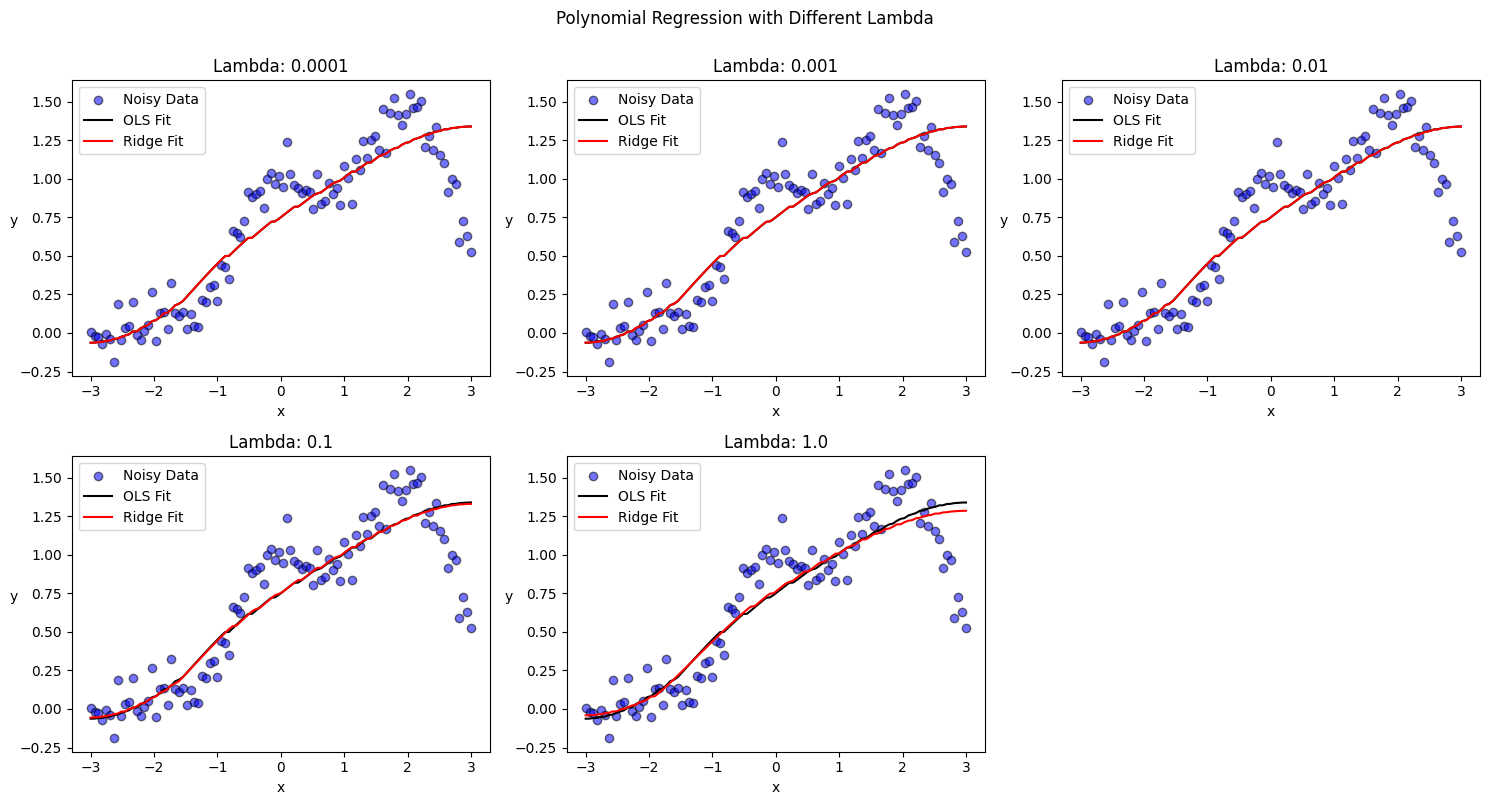

In [6]:
p = 6
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
identity = np.identity(p)
X = matrix_creation(n,p)

# Scale the data by subtracting the mean
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i in range(X_scaled.shape[0]):
    X_scaled[i][0] = 1

model = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
X_scaled, X_train, X_test, y_train, y_test = split_data(X_scaled, y, percentage = 80)
model.fit(X_train, y_train)

# ---------------------- OLS ----------------------
beta_OLS = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_train_pred_ols = X_train @ beta_OLS
y_test_pred_ols = X_test @ beta_OLS

MSE_train_ols = mean_squared_error(y_train, y_train_pred_ols)
MSE_test_ols = mean_squared_error(y_test, y_test_pred_ols)

R2_train_ols = r2_score(y_train, y_train_pred_ols)
R2_test_ols = r2_score(y_test, y_test_pred_ols)

# ---------------------- Ridge ----------------------
MSE_train_ridge = []
MSE_test_ridge = []
R2_train_ridge = []
R2_test_ridge = []

number_row = 2
number_col = int(np.ceil(len(lambdas)/number_row))
fig, axes = plt.subplots(number_row, number_col, figsize = (15, 8))
axes = axes.flatten()

for l in range(len(lambdas)):
    beta_Ridge = np.linalg.inv(X_train.T @ X_train + lambdas[l] * identity) @ X_train.T @ y_train
    y_train_pred_ridge = X_train @ beta_Ridge
    y_test_pred_ridge = X_test @ beta_Ridge

    # Subplot
    ax = axes[l]
    ax.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Noisy Data')
    ax.plot(np.sort(x, axis = 0), np.sort(X_scaled @ beta_OLS, axis = 0), color='k', label = 'OLS Fit')
    ax.plot(np.sort(x, axis = 0), np.sort(X_scaled @ beta_Ridge, axis = 0), color='r', label = 'Ridge Fit')
    ax.set_title(f'Lambda: {lambdas[l]}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.legend()

    MSE_train_ridge.append(mean_squared_error(y_train, y_train_pred_ridge))
    MSE_test_ridge.append(mean_squared_error(y_test, y_test_pred_ridge))

    R2_train_ridge.append(r2_score(y_train, y_train_pred_ridge))
    R2_test_ridge.append(r2_score(y_test, y_test_pred_ridge))

# ---------------------- Results ----------------------
def print_tables_side_by_side(table1, table2):
    table1_lines = table1.get_string().splitlines()
    table2_lines = table2.get_string().splitlines()

    for line1, line2 in zip(table1_lines, table2_lines):
        print(f"{line1}   {line2}")

mse_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge"]
mse_table.field_names = field_names

for l in range(len(lambdas)):
    mse_table.add_row([f"MSE Training set (lambda = {lambdas[l]})", MSE_train_ols, MSE_train_ridge[l]])
    mse_table.add_row([f"MSE Test set (lambda = {lambdas[l]})", MSE_test_ols, MSE_test_ridge[l]])
    if l != len(lambdas)-1:
        mse_table.add_row(['-' * 20] * len(field_names))

r2_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge"]
r2_table.field_names = field_names

for l in range(len(lambdas)):
    r2_table.add_row([f"R2 Training set (lambda = {lambdas[l]})", R2_train_ols, R2_train_ridge[l]])
    r2_table.add_row([f"R2 Test set (lambda = {lambdas[l]})", R2_test_ols, R2_test_ridge[l]])
    if l != len(lambdas)-1:
        r2_table.add_row(['-' * 20] * len(field_names))

print_tables_side_by_side(mse_table, r2_table)

plt.suptitle('Polynomial Regression with Different Lambda', y = 1)
for j in range(len(lambdas), number_row * number_col):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

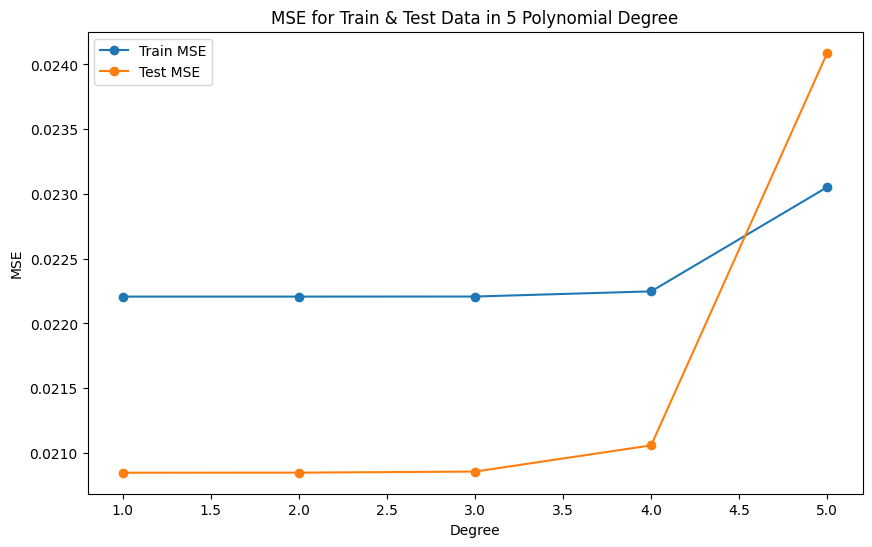

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(lambdas)+1), MSE_train_ridge, label='Train MSE', marker='o')
plt.plot(range(1, len(lambdas)+1), MSE_test_ridge, label='Test MSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE for Train & Test Data in 5 Polynomial Degree')
plt.legend()
plt.show()

### Scikit-learn

+------------------------------------+------------------------+----------------------+   +-----------------------------------+------------------------+----------------------+
|                                    | Ordinary least squares |        Ridge         |   |                                   | Ordinary least squares |        Ridge         |
+------------------------------------+------------------------+----------------------+   +-----------------------------------+------------------------+----------------------+
| MSE Training set (lambda = 0.0001) | 0.0067050779481377136  | 0.007456703551893923 |   | R2 Training set (lambda = 0.0001) |   0.9737855240123248   |  0.9715114456492214  |
|   MSE Test set (lambda = 0.0001)   |  0.06459822378007406   | 0.00806287864861358  |   |   R2 Test set (lambda = 0.0001)   |   0.7258614824724059   |  0.9620149954606638  |
|        --------------------        |  --------------------  | -------------------- |   |        --------------------       

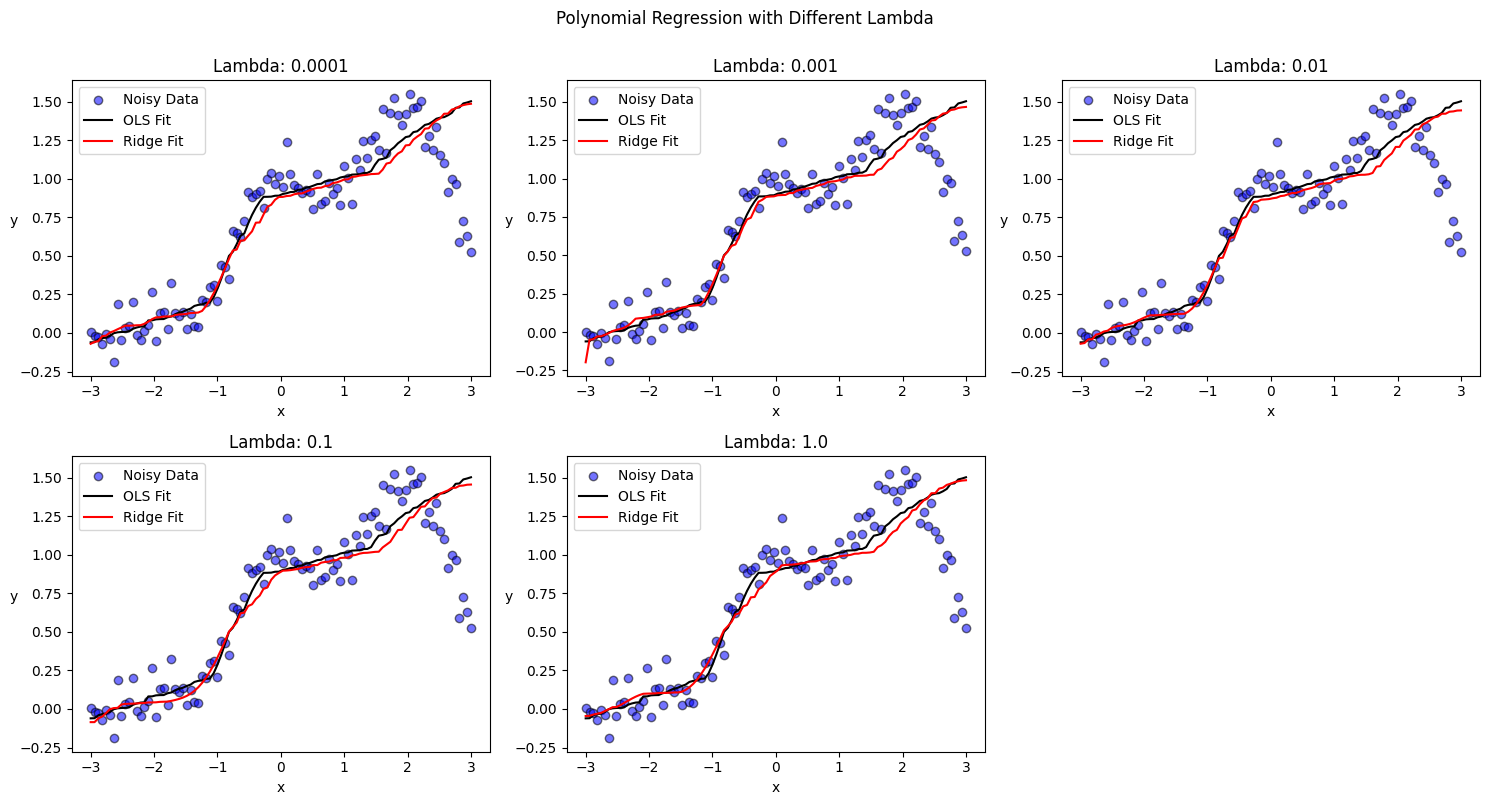

In [8]:
p = 6
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
identity = np.identity(p)
X = matrix_creation(n,p)

# Scale the data by subtracting the mean
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i in range(X_scaled.shape[0]):
    X_scaled[i][0] = 1

# ---------------------- OLS ----------------------
model_ols = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
X_scaled, X_train, X_test, y_train, y_test = split_data(X_scaled, y, percentage = 80)
model_ols.fit(X_train, y_train)
y_train_pred_ols = model_ols.predict(X_train)
y_test_pred_ols = model_ols.predict(X_test)

MSE_train_ols_sk = mean_squared_error(y_train, y_train_pred_ols)
MSE_test_ols_sk = mean_squared_error(y_test, y_test_pred_ols)

R2_train_ols_sk = r2_score(y_train, y_train_pred_ols)
R2_test_ols_sk = r2_score(y_test, y_test_pred_ols)

# ---------------------- Ridge ----------------------
MSE_train_ridge_sk = []
MSE_test_ridge_sk = []
R2_train_ridge_sk = []
R2_test_ridge_sk = []

number_row = 2
number_col = int(np.ceil(len(lambdas)/number_row))
fig, axes = plt.subplots(number_row, number_col, figsize = (15, 8))
axes = axes.flatten()

for l in range(len(lambdas)):
    model_ridge = make_pipeline(PolynomialFeatures(degree = 5), Ridge(alpha = lambdas[l]))
    X_scaled, X_train, X_test, y_train, y_test = split_data(X_scaled, y, percentage = 80)
    model_ridge.fit(X_train, y_train)
    y_train_pred_ridge = model_ridge.predict(X_train)
    y_test_pred_ridge = model_ridge.predict(X_test)

    # Subplot
    ax = axes[l]
    ax.scatter(x, y, color = 'blue', alpha = 0.55, edgecolor = 'k', label = 'Noisy Data')
    ax.plot(np.sort(x, axis = 0), np.sort(model_ols.predict(X_scaled), axis = 0), color='k', label = 'OLS Fit')
    ax.plot(np.sort(x, axis = 0), np.sort(model_ridge.predict(X_scaled), axis = 0), color='r', label = 'Ridge Fit')
    ax.set_title(f'Lambda: {lambdas[l]}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.legend()

    MSE_train_ridge_sk.append(mean_squared_error(y_train, y_train_pred_ridge))
    MSE_test_ridge_sk.append(mean_squared_error(y_test, y_test_pred_ridge))

    R2_train_ridge_sk.append(r2_score(y_train, y_train_pred_ridge))
    R2_test_ridge_sk.append(r2_score(y_test, y_test_pred_ridge))

# ---------------------- Results ----------------------
def print_tables_side_by_side(table1, table2):
    table1_lines = table1.get_string().splitlines()
    table2_lines = table2.get_string().splitlines()

    for line1, line2 in zip(table1_lines, table2_lines):
        print(f"{line1}   {line2}")

mse_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge"]
mse_table.field_names = field_names

for l in range(len(lambdas)):
    mse_table.add_row([f"MSE Training set (lambda = {lambdas[l]})", MSE_train_ols_sk, MSE_train_ridge_sk[l]])
    mse_table.add_row([f"MSE Test set (lambda = {lambdas[l]})", MSE_test_ols_sk, MSE_test_ridge_sk[l]])
    if l != len(lambdas)-1:
        mse_table.add_row(['-' * 20] * len(field_names))

r2_table = PrettyTable()

field_names = ["", "Ordinary least squares", "Ridge"]
r2_table.field_names = field_names

for l in range(len(lambdas)):
    r2_table.add_row([f"R2 Training set (lambda = {lambdas[l]})", R2_train_ols_sk, R2_train_ridge_sk[l]])
    r2_table.add_row([f"R2 Test set (lambda = {lambdas[l]})", R2_test_ols_sk, R2_test_ridge_sk[l]])
    if l != len(lambdas)-1:
        r2_table.add_row(['-' * 20] * len(field_names))

print_tables_side_by_side(mse_table, r2_table)

plt.suptitle('Polynomial Regression with Different Lambda', y = 1)
for j in range(len(lambdas), number_row * number_col):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

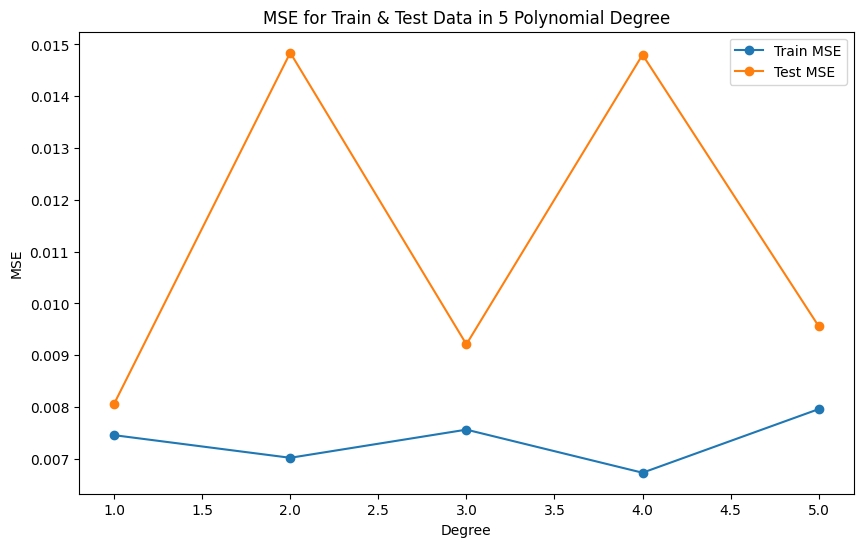

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(lambdas)+1), MSE_train_ridge_sk, label='Train MSE', marker='o')
plt.plot(range(1, len(lambdas)+1), MSE_test_ridge_sk, label='Test MSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE for Train & Test Data in 5 Polynomial Degree')
plt.legend()
plt.show()

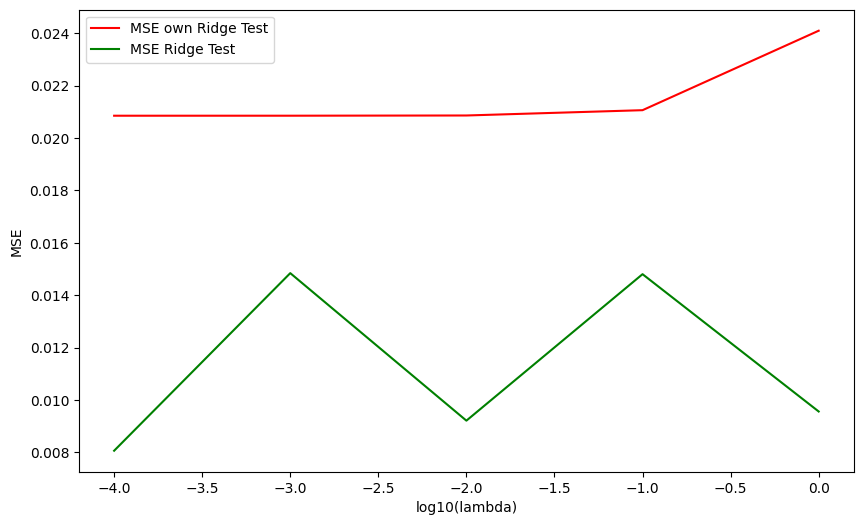

In [10]:
# Now plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), MSE_test_ridge, 'r', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSE_test_ridge_sk, 'g', label = 'MSE Ridge Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()